## "Uczenie Maszynowe" ~ Piotr Pijanowski

### LISTA 2

#### Przygotowanie danych oraz wyświetlenie wykresów

In [444]:
import pandas as pd
import plotly.express as px

# Wczytanie danych
data = pd.read_csv('data1.csv')
X, Y = data[['x1', 'x2']], data[['y']]

fig = px.scatter(
    data_frame=data,
    x='x1',
    y='x2',
    color='y',
    title='<span style="color: white"> Wizualizacja 2D punktów pokolorowanych w zależności od y-ka',
    color_continuous_scale='Viridis'
)

fig.update_traces(marker=dict(size=9))

# To są rozmiary wygodne dla mojego laptopa
fig.update_layout(
    width=1300,
    height=725,
    title_x=0.5,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    xaxis_title='x<sub>1</sub>',
    yaxis_title='x<sub>2</sub>',
)

fig.show()

<div align="center">

##### <span style="color: purple"> Z wykresu wynika, ze jedna wartość mocno odbiega od reszty. Jest to ta zółta kropka po lewej stronie.

</div>

<div align='center'>

# Wykres 3D

</div>

In [445]:
fig = px.scatter_3d(
    data_frame=data,
    x='x1',
    y='x2',
    z='y',
    color='y',
    color_continuous_scale='Viridis',
    title='3D data'
)

fig.update_layout(
    scene=dict(
        xaxis=dict(title='x₁', backgroundcolor='black', gridcolor='#222', zerolinecolor='#444', color='white'),
        yaxis=dict(title='x₂', backgroundcolor='black', gridcolor='#222', zerolinecolor='#444', color='white'),
        zaxis=dict(title='y',  backgroundcolor='black', gridcolor='#222', zerolinecolor='#444', color='white'),
        bgcolor='black'
    ),
    width=1300,
    height=725,
    paper_bgcolor='black',
    font_color='white',
    title_x=0.5
)

fig.show()

<div align="center" style="color: #8A2BE2">

# Funkcja związana za preprocessing

</div>

In [446]:
import numpy as np

def preprocess_data(X_train, y_train):
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    joined_data = np.hstack((X_train, y_train.reshape(-1, 1)))
    mean = np.mean(joined_data, axis=0)
    std = np.std(joined_data, axis=0)
    upper_bound = mean + 2.0 * std
    lower_bound = mean - 2.0 * std
    within_vals = (joined_data >= lower_bound) & (joined_data <= upper_bound)
    indices = np.all(within_vals, axis=1)

    return X_train[indices], y_train[indices]

Wybieranie danych treningowych i testowych

In [447]:
from sklearn.model_selection import train_test_split

random_seed = np.random.randint(low=1, high=100)        # Wybranie losowego seed'a (zapytać czy to nie byłoby dobre rozwiązanie)
SEED = 53

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=SEED)
X_train_pre, y_train_pre = preprocess_data(X_train, Y_train)

print(f'Dane traningowe:\n\n{X_train}\n\n Dane testowe:\n\n{X_test}')
print(f'Dane traningowe:\n\n{Y_train}\n\n Dane testowe:\n\n{Y_test}')


Dane traningowe:

            x1          x2
0    -9.632982  380.285723
65   -2.747975   88.843124
72  -48.587858   14.754779
10    6.826339   55.797544
94    0.127159   96.740916
..         ...         ...
22  -68.467769  265.008914
61  -29.405964   44.020770
37   43.177647  291.602867
29 -458.806254  130.132132
25  505.112078  310.053129

[80 rows x 2 columns]

 Dane testowe:

            x1          x2
19   30.503425  176.060998
78   24.880427  304.647846
64 -584.673484  204.298921
3  -420.984843  346.470458
71   -0.000102  120.351324
32  -51.282365  217.078433
68    0.032365  281.207584
42  -32.942262  130.073329
55  -45.336203   64.488515
97  -20.346170  139.683830
49 -521.406970   43.156571
81   11.613948  214.309874
73    6.415843  201.071609
79  -88.094988  291.286539
57   11.581113  348.584236
28 -339.922097   78.393145
56  387.021491  323.248152
39  -13.830280   46.347624
82 -335.487669  334.120998
34 -375.655500  394.754775
Dane traningowe:

             y
0  -382.598729
65 

Funkcja pomocnicza

<div align="center" style="color: #8A2BE2"> 

## **MODELE BAZOWE**

</div>

In [448]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

base_model = DummyRegressor(strategy="mean")
base_model.fit(X_train, Y_train)
Y_pred_base = base_model.predict(X_test)

mse_base = mean_squared_error(Y_test, Y_pred_base)
r2_score_base = base_model.score(X_test, Y_test)

print(f"Baseline (mean) \nMSE:, {mse_base:.2f} \nR\u00b2: {r2_score_base:.4f}\n")


base_model_pre = DummyRegressor(strategy="mean")
base_model_pre.fit(X_train_pre, y_train_pre)
Y_pred_base_pre = base_model_pre.predict(X_test)

mse_base_pre = mean_squared_error(Y_test, Y_pred_base_pre)
r2_score_base_pre = base_model_pre.score(X_test, Y_test)

print(f"Baseline Pre (mean) \nMSE:, {mse_base_pre:.2f} \nR\u00b2: {r2_score_base_pre:.4f}\n")


Baseline (mean) 
MSE:, 89917.12 
R²: -0.4614

Baseline Pre (mean) 
MSE:, 95881.34 
R²: -0.5584



<div align="center" style="color: #8A2BE2"> 

## **MODELE LINIOWE**

</div>

In [449]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
Y_pred_lin = linear_reg.predict(X_test)

mse_lin = mean_squared_error(Y_test, Y_pred_lin)
r2_score_lin = linear_reg.score(X_test, Y_test)

print(f"Linear (raw) \nMSE: {mse_lin:.2f} \nR\u00b2: {r2_score_lin:.4f}\n")


linear_reg_pre = LinearRegression()
linear_reg_pre.fit(X_train_pre, y_train_pre)
Y_pred_lin_pre = linear_reg_pre.predict(X_test)

mse_lin_pre = mean_squared_error(Y_test, Y_pred_lin_pre)
r2_score_lin_pre = linear_reg_pre.score(X_test, Y_test)

print(f"Linear Pre \nMSE: {mse_lin_pre:.2f} \nR\u00b2: {r2_score_lin_pre:.4f}\n")


Linear (raw) 
MSE: 2893.44 
R²: 0.9530

Linear Pre 
MSE: 1.76 
R²: 1.0000



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning:

X has feature names, but LinearRegression was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [450]:
import plotly.graph_objects as go

x1_lin = np.linspace(X["x1"].min(), X["x1"].max(), 2)
x2_lin = np.linspace(X["x2"].min(), X["x2"].max(), 2)
X1_grid, X2_grid = np.meshgrid(x1_lin, x2_lin)
X_grid = np.column_stack([X1_grid.ravel(), X2_grid.ravel()])
Z_pred = linear_reg.predict(X_grid).reshape(X1_grid.shape)

scatter = go.Scatter3d(
    x=X_test["x1"], y=X_test["x2"], z=Y_test["y"],
    mode="markers",
    marker=dict(size=8, color=data["y"], colorscale="Viridis", opacity=0.9, colorbar=dict(title="y")),
    name="Dane (raw)"
)

plane = go.Surface(
    x=X1_grid, y=X2_grid, z=Z_pred,
    opacity=0.6, showscale=False, name="Płaszczyzna regresji"
)

fig = go.Figure(data=[scatter, plane])
fig.update_layout(
    title=f"Płaszczyzna regresji liniowej | R\u00b2 = {r2_score_lin:.4f}",
    scene=dict(
        xaxis=dict(title="x₁", backgroundcolor="black", gridcolor="#222", zerolinecolor="#444", color="white"),
        yaxis=dict(title="x₂", backgroundcolor="black", gridcolor="#222", zerolinecolor="#444", color="white"),
        zaxis=dict(title="y",  backgroundcolor="black", gridcolor="#222", zerolinecolor="#444", color="white"),
        bgcolor="black",
    ),
    width=1300,
    height=725,
    paper_bgcolor="black", font_color="white",
    title_x=0.5
)

fig.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [451]:
import plotly.graph_objects as go

x1_lin = np.linspace(X["x1"].min(), X["x1"].max(), 2)
x2_lin = np.linspace(X["x2"].min(), X["x2"].max(), 2)
X1_grid, X2_grid = np.meshgrid(x1_lin, x2_lin)
X_grid = np.column_stack([X1_grid.ravel(), X2_grid.ravel()])
Z_pred = linear_reg_pre.predict(X_grid).reshape(X1_grid.shape)

scatter = go.Scatter3d(
    x=X_test["x1"], y=X_test["x2"], z=Y_test["y"],
    mode="markers",
    marker=dict(size=8, color=data["y"], colorscale="Viridis", opacity=0.9, colorbar=dict(title="y")),
    name="Dane (raw)"
)

plane = go.Surface(
    x=X1_grid, y=X2_grid, z=Z_pred,
    opacity=0.6, showscale=False, name="Płaszczyzna regresji"
)

fig = go.Figure(data=[scatter, plane])
fig.update_layout(
    title=f"Płaszczyzna regresji liniowej dla spreprocesowanych danych | R\u00b2 = {r2_score_lin_pre:.4f}",
    scene=dict(
        xaxis=dict(title="x₁", backgroundcolor="black", gridcolor="#222", zerolinecolor="#444", color="white"),
        yaxis=dict(title="x₂", backgroundcolor="black", gridcolor="#222", zerolinecolor="#444", color="white"),
        zaxis=dict(title="y",  backgroundcolor="black", gridcolor="#222", zerolinecolor="#444", color="white"),
        bgcolor="black"
    ),
    width=1300,
    height=725,
    paper_bgcolor="black", font_color="white",
    title_x=0.5
)

fig.show()

<div align="center" style="color: #8A2BE2"> 

# **Zadanie 3**

</div>

Wczytanie danych

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("advertising.csv")

X = data[['TV', 'Radio', 'Newspaper']]
Y = data[['Sales']]

In [453]:
fig = px.scatter_3d(
    data_frame=data,
    x='TV',
    y='Radio',
    z='Newspaper',
    color='Sales',
    color_continuous_scale='Viridis',
    title='Dane 3D'
)

fig.update_layout(
    scene=dict(
        xaxis=dict(title='x₁', backgroundcolor='black', gridcolor='#222', zerolinecolor='#444', color='white'),
        yaxis=dict(title='x₂', backgroundcolor='black', gridcolor='#222', zerolinecolor='#444', color='white'),
        zaxis=dict(title='y',  backgroundcolor='black', gridcolor='#222', zerolinecolor='#444', color='white'),
        bgcolor='black'
    ),
    width=1300,
    height=725,
    paper_bgcolor='black',
    font_color='white',
    title_x=0.5
)

fig.show()

Podziel dane na treningowe i testowe

In [454]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=87,
    shuffle=True,
)

In [455]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
Y_pred = lin_model.predict(X_test)

mse_lin = mean_squared_error(Y_test, Y_pred)
r2_score_lin = lin_model.score(X_test, Y_test)

print(f"Linear Model \nMSE: {mse_lin:.2f} \nR\u00b2: {r2_score_lin:.4f}\n")

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm  = scaler.transform(X_test)

lin_model_norm = LinearRegression()
lin_model_norm.fit(X_train_norm, Y_train)
Y_pred_norm = lin_model_norm.predict(X_test_norm)

mse_lin_norm = mean_squared_error(Y_test, Y_pred_norm)
r2_score_lin_norm = lin_model_norm.score(X_test_norm, Y_test)

print(f"Linear Model \nMSE: {mse_lin_norm:.2f} \nR\u00b2: {r2_score_lin_norm:.4f}\n")

Linear Model 
MSE: 3.54 
R²: 0.8468

Linear Model 
MSE: 3.54 
R²: 0.8468



Wnioski:

Oba modele regresji liniowej osiągnęły identyczne wartości błędu średniokwadratowego (MSE) i współczynnika determinacji (R²), ponieważ regresja liniowa bez regularizacji jest niezmiennicza na przekształcenia liniowe cech.

Ze względu na identyczne wyniki, oba modele są równoważne pod względem jakości predykcji.
Jednak model uczony na znormalizowanych danych jest bardziej uniwersalny jego współczynniki są lepiej skalibrowane i gotowe do dalszego wykorzystania w modelach z regularizacją, dlatego model z normalizacją można uznać za lepszy kandydat do ewaluacji na zbiorze testowym.

Zadanie 4

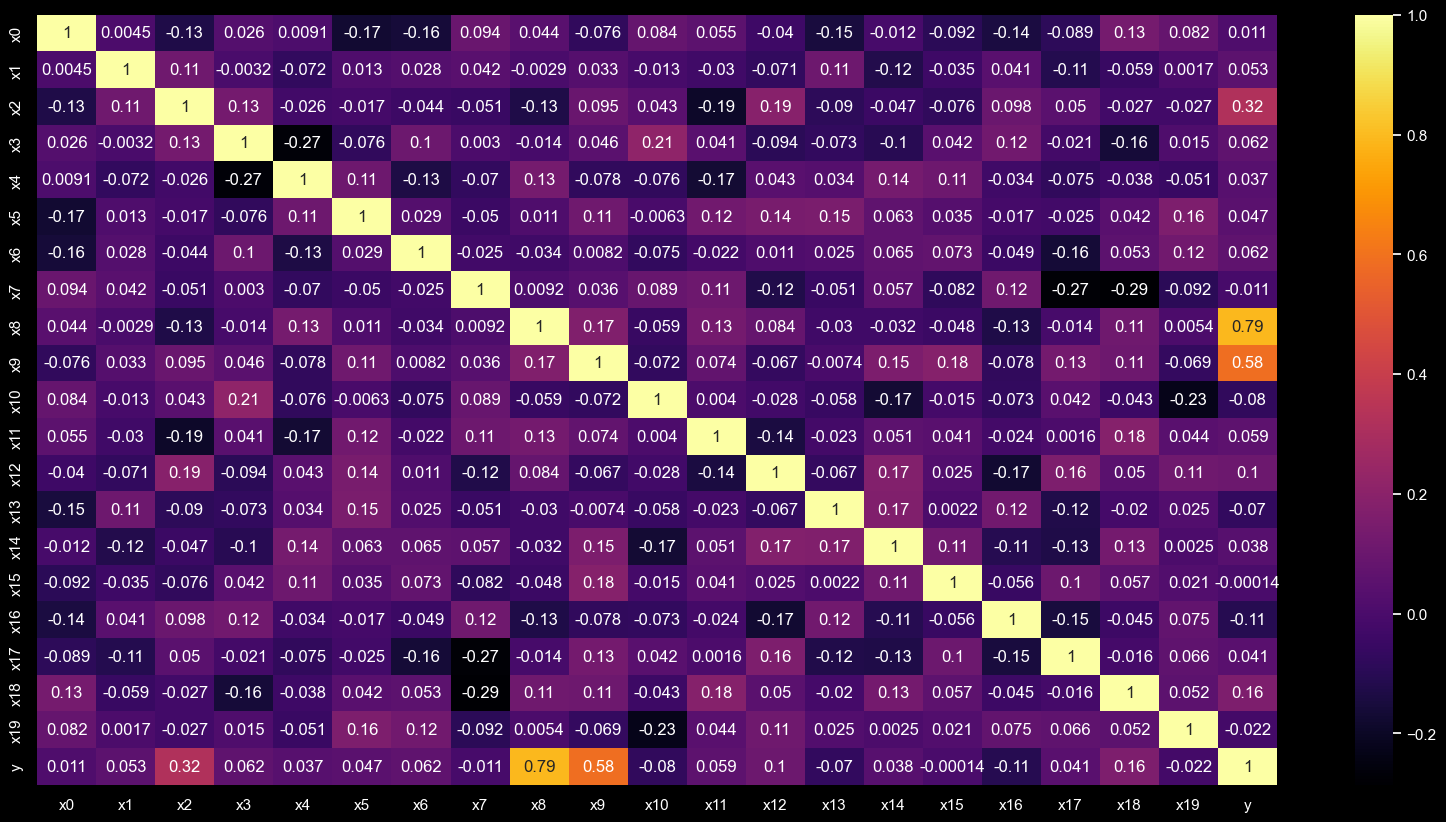

In [456]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

data = pd.read_csv("data4.csv")

corr_data4 = data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_data4, annot=True, cmap='inferno')
plt.show()

In [457]:
X = data.iloc[:, :20]
y = data['y']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=38)

In [458]:
# Regresja zwykla
lin_reg = make_pipeline(MinMaxScaler(), LinearRegression())
lin_reg.fit(X_train, Y_train)

Y_pred_lin = lin_reg.predict(X_test)
mse_lin_pipe = mean_squared_error(Y_test, Y_pred_lin)
r2_lin_pipe = lin_reg.score(X_test, Y_test)

print(f"Linear Pipeline (MinMaxScaler + LinearRegression)\n"
      f"MSE: {mse_lin_pipe:.2f}\nR²: {r2_lin_pipe:.4f}\n")


Linear Pipeline (MinMaxScaler + LinearRegression)
MSE: 120.32
R²: 0.9887



In [459]:
from sklearn.linear_model import Ridge

ridge_reg = make_pipeline(MinMaxScaler(), Ridge(alpha=3.25))
ridge_reg.fit(X_train, Y_train)

Y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
r2_ridge = ridge_reg.score(X_test, Y_test)

print(f"Ridge (alpha=3.25) + MinMaxScaler\n"
      f"MSE: {mse_ridge:.2f}\nR²: {r2_ridge:.4f}\n")



Ridge (alpha=3.25) + MinMaxScaler
MSE: 2333.32
R²: 0.7816

